In [ ]:
import pandas as pd
from skmultilearn.problem_transform import ClassifierChain
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedKFold

In [ ]:
###Laod data
df = pd.read_csv('Finalplfam_iddataset_Multilabel_final.csv',index_col=0)
Y=df[['amoxicillin','ampicillin','aztreonam','cefepime','cefotaxime','cefoxitin','ceftazidime','cefuroxime',
      'ciprofloxacin','gentamicin','piperacillin','tobramycin','trimethoprim','sulfamethoxazole']]
droppeddf=df.drop(columns=['genome_id', 'genome_name','amoxicillin','ampicillin','aztreonam','cefepime',
                           'cefotaxime','cefoxitin','ceftazidime','cefuroxime','ciprofloxacin','gentamicin','piperacillin',
                           'tobramycin','trimethoprim','sulfamethoxazole'])
X=droppeddf

In [ ]:
###Save label category
Y.to_csv('Input_Label.csv')

In [4]:
##Convert Nan to -1 for Data analysis propose only
Y=Y.fillna(-1)

In [ ]:
Labellist=['amoxicillin','ampicillin','aztreonam','cefepime',
                           'cefotaxime','cefoxitin','ceftazidime','cefuroxime','ciprofloxacin','gentamicin','piperacillin',
                           'tobramycin','trimethoprim','sulfamethoxazole']

In [6]:
###Data distribution check
for index, label in enumerate(Labellist):
    V= Y[label].value_counts()
    if(index==0):
        df_val_counts = pd.DataFrame(V)
    else:
        df_val_counts_t = pd.DataFrame(V)
        df_val_counts = df_val_counts.join(df_val_counts_t)
        
print (df_val_counts)
df_val_counts.to_csv('Input_Label_Supplementry.csv')

      amoxicillin  ampicillin  aztreonam  cefepime  cefotaxime  cefoxitin  \
-1.0          791        1118       1322      1216         305       1297   
 1.0          663         597        158       132         255        113   
 0.0          435         174        409       541        1329        479   

      ceftazidime  cefuroxime  ciprofloxacin  gentamicin  piperacillin  \
-1.0          137         377             34          44           154   
 1.0          290         245            556         249           191   
 0.0         1462        1267           1299        1596          1544   

      tobramycin  trimethoprim  sulfamethoxazole  
-1.0        1276          1473              1593  
 1.0         118           151               191  
 0.0         495           265               105  


In [7]:
######Check number of full labelled data

In [8]:
###Laod data
df = pd.read_csv('Finalplfam_iddataset_Multilabel_final.csv',index_col=0)
Y=df[['amoxicillin','ampicillin','aztreonam','cefepime','cefotaxime','cefoxitin','ceftazidime','cefuroxime',
      'ciprofloxacin','gentamicin','piperacillin','tobramycin','trimethoprim','sulfamethoxazole']]

In [9]:
Y=Y.dropna()
len(Y)

1

In [4]:
kfold = RepeatedKFold(n_splits=5,n_repeats=3, random_state=20210101)
scorelist=[]

In [5]:
def hamming_score(y_pred,y_true):
    i=0
    scorelist=[]
    for  amrtrue in y_true:
        match=0.0
        total=0.0
        #print(amrtrue, y_pred[i])
        j=0
        for trueentry in amrtrue:
            #print(trueentry)
            if (trueentry == y_pred[i][j]):
                #print ('match found')
                match=match+1
                total=total+1
            elif (not (np.isnan(trueentry))):
                total = total + 1
            j=j+1
        i=i+1
        #print (match, total, (match/total))
        scorelist.append(match/total)
    return np.mean(scorelist)

In [6]:
import numpy as np
def Modified_F1_Score(y_pred,y_true):
    #i=0
    scorelist=[]
    for  i,amrtrue in enumerate(y_true):
        TP,FP,TN,FN=0.00000001,0.00000001,0.00000001,0.00000001
        #j=0
        for j,trueentry in enumerate(amrtrue):
            if ((np.isnan(trueentry))):
                continue
            elif ((trueentry == 1) and (y_pred[i][j]==1)):
                TP=TP+1
            elif ((trueentry == 1) and (y_pred[i][j]==0)):
                FN=FN+1
            elif ((trueentry == 0) and (y_pred[i][j]==0)):
                TN=TN+1
            elif ((trueentry == 0) and (y_pred[i][j]==1)):
                FP=FP+1
            #j=j+1
        #i=i+1
        precision=TP/(TP+FP)
        recall=TP/(TP+FN)
        fscore=(2*precision*recall)/(precision+recall)
        scorelist.append(fscore)
    return np.mean(scorelist)

In [7]:
####Impute Susceptble for missing lables

In [8]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier

In [15]:
###Laod data
df = pd.read_csv('Finalplfam_iddataset_Multilabel_final.csv',index_col=0)
Y=df[['amoxicillin','ampicillin','aztreonam','cefepime','cefotaxime','cefoxitin','ceftazidime','cefuroxime',
      'ciprofloxacin','gentamicin','piperacillin','tobramycin','trimethoprim','sulfamethoxazole']]
droppeddf=df.drop(columns=['genome_id', 'genome_name','amoxicillin','ampicillin','aztreonam','cefepime',
                           'cefotaxime','cefoxitin','ceftazidime','cefuroxime','ciprofloxacin','gentamicin','piperacillin',
                           'tobramycin','trimethoprim','sulfamethoxazole'])
X=droppeddf

In [9]:
X=X.fillna(0)
#Y=Y.fillna(0)

In [10]:
print("Before removing low variance: ", X.shape)
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.01)
selector.fit_transform(X)
X = X[X.columns[selector.get_support()]].copy()
print("After removing low variance: ", X.shape)

Before removing low variance:  (1889, 37616)
After removing low variance:  (1889, 12453)


In [11]:
####Base models
svmmodel=SVC(class_weight='balanced',C=0.01,kernel='linear',gamma=1e-06,probability=True)
gaussianmodel=GaussianNB()
linearregressionmodel=LogisticRegression(solver='lbfgs',max_iter=10000)
rfmodel = RandomForestClassifier(bootstrap=True, max_depth=10, max_features='sqrt', random_state=1)
xgbmodel = XGBClassifier()
sgdmodel = SGDClassifier(loss="hinge", penalty="l1", shuffle=True, class_weight="balanced", alpha=0.0001)
modellist=[svmmodel,gaussianmodel,linearregressionmodel,rfmodel,xgbmodel,sgdmodel]
namelist=['SVM','Gaussian','LinearRegression','randomforest','xgb','sgd']

In [12]:
###Binary relevance with different base models

In [13]:
from skmultilearn.problem_transform import BinaryRelevance

In [25]:
def BinaryRelevanceModel(X,Y,kfold, basemodel, name):
    classifier = BinaryRelevance(basemodel)
    hammingscorelist=[]
    fscorelist=[]
    for train_index, test_index in kfold.split(X, Y):
        # split data into train/test sets
        x_train_tfidf = X.iloc[train_index]
        y_train_tfidf = Y.iloc[train_index]
        x_test_tfidf = X.iloc[test_index]
        y_test_tfidf = Y.iloc[test_index]
        y_train_tfidf=y_train_tfidf.fillna(0)
        classifier.fit(x_train_tfidf.values, y_train_tfidf.values)
        # calculating test accuracy
        prediction = classifier.predict(x_test_tfidf.values)
        hammingscore=hamming_score(prediction.toarray(),y_test_tfidf.values)
        fscore=Modified_F1_Score(prediction.toarray(),y_test_tfidf.values)
        print(fscore, hammingscore)
        hammingscorelist.append(hammingscore)
        fscorelist.append(fscore)
    print ('Base model for BR is {}'.format(name))
    print('Test Hamming accuracy for Binary relvance is {}'.format(np.mean(hammingscorelist)))
    print('Test F-score accuracy for Binary relvance is {}'.format(np.mean(fscorelist)))
    print('Hamming std'+str(np.std(hammingscorelist)))
    print('F-Score std'+str(np.std(fscorelist)))
    return np.mean(hammingscorelist),np.mean(fscorelist),np.std(hammingscorelist),np.std(fscorelist)


In [26]:
i=0
for basemodel in modellist:
    hamming, fscore, hmstd, fstd=BinaryRelevanceModel(X,Y,kfold,basemodel,namelist[i])
    i=i+1

0.5529985761130501 0.8790933713552761
0.61026954095876 0.8969048000794032
0.5695255683530335 0.891836830130481
0.600513641917167 0.8928433045496537
0.5682075686344885 0.8897187104083654
0.5751194499596205 0.899134676317216
0.5447899664933322 0.8857328958519435
0.5751907407648772 0.8888798224115685
0.5981982385691066 0.8878801239912351
0.5823202156981032 0.8871679087196328
0.5869575983985184 0.9096264993090389
0.5821502056376934 0.8751784664483077
0.5867220855323141 0.891512250242409
0.5793977244802178 0.8881872389808899
0.5599462673285732 0.8841466962156617
Base model for BR is SVM
Test Hamming accuracy for Binary relvance is 0.8898562396674057
Test F-score accuracy for Binary relvance is 0.5781538259225905
Hamming std0.007907758466136654
F-Score std0.017103155060810782
0.42604480282405155 0.8048871175855301
0.4512870255557537 0.8129509379509379
0.43883555263116203 0.8139005321545004
0.4493565046903811 0.8102309947548043
0.44632105727019034 0.8183782692403381
0.4440389411208087 0.82230

C:\Users\cvssp_user\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


0.546474990916415 0.8768424990647212
0.5358050835151893 0.8783559327210121
0.5690582075076965 0.8720140749902654
0.5216183093963984 0.8754323262943953
0.537527543119152 0.8810281576154593
0.4772629690305436 0.8630604991716102
0.5243573728874392 0.8691869564885438
0.5374864767994934 0.8652511509654367
0.49631812862840546 0.8552661897489484
0.5304265172782958 0.8892780793574444
0.5272832681900643 0.8504770875802622
0.5016948134560262 0.872185574566527
0.5184145207862454 0.86540318147461
0.5013238442626374 0.8674706519534104
Base model for BR is sgd
Test Hamming accuracy for Binary relvance is 0.8683648671734788
Test F-score accuracy for Binary relvance is 0.5212164521884343
Hamming std0.011459629224390548
F-Score std0.022983750891639704


In [27]:
from skmultilearn.problem_transform import LabelPowerset

In [28]:
def LabelPowerSetModel(X,Y,kfold, basemodel, name):
    classifier = LabelPowerset(basemodel)
    hammingscorelist=[]
    fscorelist=[]
    for train_index, test_index in kfold.split(X, Y):
        # split data into train/test sets
        x_train_tfidf = X.iloc[train_index]
        y_train_tfidf = Y.iloc[train_index]
        x_test_tfidf = X.iloc[test_index]
        y_test_tfidf = Y.iloc[test_index]
        y_train_tfidf=y_train_tfidf.fillna(0)
        classifier.fit(x_train_tfidf.values, y_train_tfidf.values)
        # calculating test accuracy
        prediction = classifier.predict(x_test_tfidf.values)
        hammingscore=hamming_score(prediction.toarray(),y_test_tfidf.values)
        fscore=Modified_F1_Score(prediction.toarray(),y_test_tfidf.values)
        hammingscorelist.append(hammingscore)
        fscorelist.append(fscore)
        print(fscore, hammingscore)
    print ('Base model for LP is {}'.format(name))
    print('Test Hamming accuracy for LP is {}'.format(np.mean(hammingscorelist)))
    print('Test F-score accuracy for LP is {}'.format(np.mean(fscorelist)))
    print('Hamming std'+str(np.std(hammingscorelist)))
    print('F-Score std'+str(np.std(fscorelist)))
    return np.mean(hammingscorelist),np.mean(fscorelist)


In [29]:
i=0
for basemodel in modellist:
    hamming, fscore=LabelPowerSetModel(X,Y,kfold,basemodel,namelist[i])
    i=i+1

0.4272148214319545 0.8135388274277162
0.4582175408763133 0.8269021469418294
0.4073594109885485 0.8327293150705849
0.4444538219271873 0.823683452056468
0.41666974717945454 0.825590023003816
0.4182708024861485 0.8232282194583781
0.41856356980050935 0.8229818975850722
0.42002975587252606 0.8269638944242119
0.4424466577892175 0.824319632454553
0.4270661673396647 0.8205156912053464
0.42773382842241536 0.8351528321766416
0.427151581599799 0.807534147216687
0.41614221855002753 0.8236413645143804
0.4237446496383758 0.821475812547241
0.43667680873734355 0.8229852522955972
Base model for LP is SVM
Test Hamming accuracy for LP is 0.8234161672252348
Test F-score accuracy for LP is 0.427449425509299
Hamming std0.006414952552728864
F-Score std0.012717193116901693
0.29770609133555515 0.7588533673851133
0.3446467745931516 0.7801898424914296
0.3647789352277991 0.8035192247493835
0.3135469498231689 0.7635075242218099
0.3456042091248687 0.7919799549109894
0.34910261974000806 0.7966036021591577
0.29968860

In [30]:
from skmultilearn.problem_transform import ClassifierChain

In [31]:
def ClassifierChainModel(X,Y,kfold, basemodel, name):
    classifier = ClassifierChain(basemodel)
    hammingscorelist=[]
    fscorelist=[]
    for train_index, test_index in kfold.split(X, Y):
        # split data into train/test sets
        x_train_tfidf = X.iloc[train_index]
        y_train_tfidf = Y.iloc[train_index]
        x_test_tfidf = X.iloc[test_index]
        y_test_tfidf = Y.iloc[test_index]
        y_train_tfidf=y_train_tfidf.fillna(0)
        classifier.fit(x_train_tfidf.values, y_train_tfidf.values)
        # calculating test accuracy
        prediction = classifier.predict(x_test_tfidf.values)
        hammingscore=hamming_score(prediction.toarray(),y_test_tfidf.values)
        fscore=Modified_F1_Score(prediction.toarray(),y_test_tfidf.values)
        hammingscorelist.append(hammingscore)
        fscorelist.append(fscore)
        print(fscore, hammingscore)
    print ('Base model for CC is {}'.format(name))
    print('Test Hamming accuracy for CC is {}'.format(np.mean(hammingscorelist)))
    print('Test F-score accuracy for CC is {}'.format(np.mean(fscorelist)))
    print('Hamming std'+str(np.std(hammingscorelist)))
    print('F-Score std'+str(np.std(fscorelist)))
    return np.mean(hammingscorelist),np.mean(fscorelist)


In [32]:
#xgbmodel = XGBClassifier()
#modellist=[xgbmodel,sgdmodel]
#namelist=['xgb','sgd']

In [33]:
i=0
for basemodel in modellist:
    hamming, fscore=ClassifierChainModel(X,Y,kfold,basemodel,namelist[i])
    i=i+1

0.5406148254110351 0.8761219527092543
0.6014720066901592 0.8933644838406742
0.5686661901732137 0.8933525542652527
0.5919171160674709 0.8900234392297885
0.5734067110381559 0.8931648810959156
0.5770638869458434 0.8993233544820847
0.5387904028039087 0.8834647495361782
0.573585536000301 0.8869456087710056
0.5883500449009806 0.8832420959405087
0.590733975039994 0.8908999046930082
0.5795707614552436 0.9111780121700757
0.586141422165778 0.8776024607373814
0.5829923596745558 0.892997625537308
0.5733924950501309 0.8876275033021065
0.5503333192802954 0.8808506627472146
Base model for CC is SVM
Test Hamming accuracy for CC is 0.8893439526038505
Test F-score accuracy for CC is 0.5744687368464712
Hamming std0.008581746158633757
F-Score std0.017834097307852508
0.4232392456895093 0.8041415668399795
0.4506308914997205 0.812730479397146
0.4333296751847619 0.8137442069981753
0.4447617608855113 0.809505485695962
0.4411092267248503 0.8174257734602562
0.4413524962454213 0.8227467417943609
0.418813892156519

XGBoostError: value 0 for Parameter num_class should be greater equal to 1
num_class: Number of output class in the multi-class classification.

In [34]:
###Running again the misisng list from above due to memory error
xgbmodel = XGBClassifier()
modellist=[xgbmodel,sgdmodel]
namelist=['xgb','sgd']

In [35]:
i=0
for basemodel in modellist:
    hamming, fscore=ClassifierChainModel(X,Y,kfold,basemodel,namelist[i])
    i=i+1

0.5925112379757325 0.8981548287103842
0.6223831580725802 0.9065494323430833
0.5824073622316732 0.9108293822579536
0.6134013396626048 0.9059774807790681
0.5876523599515644 0.9089088114950183
0.60724770868819 0.9142928720309673
0.5630687984656445 0.8954452881040182
0.6067313800738575 0.9107656306069005
0.6085115787542055 0.9018011750154608
0.5974180884237915 0.90066705325326
0.5983956228200848 0.915894775418585
0.6106590245468376 0.8968323636974431
0.607259574375427 0.9116437427945363
0.6090909811637053 0.9062067195003702
0.5896295311628251 0.9065243185932841
Base model for CC is xgb
Test Hamming accuracy for CC is 0.9060329249733555
Test F-score accuracy for CC is 0.5997578497579149
Hamming std0.006092038086838763
F-Score std0.014370616439950414
0.49384458516367274 0.8505685158462934
0.5513819415107855 0.8778146163066797
0.5205466942795871 0.8783715843239652
0.5507844009180923 0.8681084274338243


C:\Users\cvssp_user\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


0.51275129847776 0.8792147507664749
0.5477209131412133 0.8879025515930279
0.5126060301169101 0.8786145659161533
0.5359042563400962 0.8750907602098079
0.5447074246254459 0.8697946967788237
0.5275272795189733 0.8668598642736574
0.5279307344815385 0.8970995861868878
0.541212362514867 0.8538998259236354
0.5200311498402348 0.878562839277125
0.526569518725745 0.8701284385808195
0.5004209919120644 0.8635105316139798
Base model for CC is sgd
Test Hamming accuracy for CC is 0.8730361036687436
Test F-score accuracy for CC is 0.5275959721044657
Hamming std0.011542791849258131
F-Score std0.017294530763338412


In [38]:
modellist=[svmmodel,gaussianmodel,linearregressionmodel,rfmodel,xgbmodel,sgdmodel]
namelist=['SVM','Gaussian','LinearRegression','randomforest','xgb','sgd']

In [39]:
#Y=Y.fillna(0)

In [17]:
from RectifiedClassifierChain import RectifiedClassiferChain

In [18]:
def RCCModelwithCE(X,Y,kfold, basemodel, name, type=0):
    sim_all_df = pd.DataFrame()
    hammingscorelist=[]
    fscorelist=[]
    for train_index, test_index in kfold.split(X, Y):
        # split data into train/test sets
        x_train_tfidf = X.iloc[train_index]
        y_train_tfidf = Y.iloc[train_index]
        x_test_tfidf = X.iloc[test_index]
        y_test_tfidf = Y.iloc[test_index]
        x_train_tfidf=x_train_tfidf.reset_index(drop=True)
        y_train_tfidf=y_train_tfidf.reset_index(drop=True)
        classifier=RectifiedClassiferChain(basemodel,optimized=True,optimizedmethod='CrossEntropy')
        classifier.trainRCC(x_train_tfidf, y_train_tfidf)
        # calculating test accuracy
        x_test_tfidf=x_test_tfidf.reset_index(drop=True)
        y_test_tfidf=y_test_tfidf.reset_index(drop=True)
        prediction = classifier.predictRCC(x_test_tfidf)
        hammingscore, fscore=classifier.Evaluate(y_test_tfidf,prediction)
        hammingscorelist.append(hammingscore)
        fscorelist.append(fscore)
        label_order=classifier.getOptimizedLabelOrder()
        print(hammingscore, fscore)
        print (label_order)
        if(type !=2):
            featuredf=classifier.getFeature(NoOfFeature=100,type=type,full=True)
            #featuredf.to_csv('Test.csv')
            sim_all_df = pd.concat([sim_all_df, featuredf], ignore_index=True)
    print ('Base model for RCC is {}'.format(name))
    print('Test Hamming accuracy for RCC is {}'.format(np.mean(hammingscorelist)))
    print('Test F-score accuracy for RCC is {}'.format(np.mean(fscorelist)))
    print('Hamming std'+str(np.std(hammingscorelist)))
    print('F-Score std'+str(np.std(fscorelist)))
    if(type !=2):
        sim_all_df_T = sim_all_df.transpose().copy()
        sim_all_df_T["feature_weight_sum"] = sim_all_df_T.apply(lambda x: abs(x).sum(), axis=1)
        sim_all_df_T_top = sim_all_df_T.sort_values("feature_weight_sum", ascending=False)[:30]
        sim_all_df_T_top.to_csv('Test_13.csv')
    else:
        sim_all_df_T_top=sim_all_df.copy()
    return np.mean(hammingscorelist),np.mean(fscorelist),sim_all_df_T_top


In [19]:
import matplotlib.pyplot as plt
import seaborn as sb

sb.set_context("talk")
def plot_coefficients(feature_names, coef, name, top_features=20):
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    #top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients =top_positive_coefficients# np.hstack([top_positive_coefficients])
    # create plot
    plt.figure(figsize=(10, 5))
    plt.title("Feature Importances Multi AMR for "+str(name), y=1.08)
    colors = ['crimson' if c < 0 else 'cornflowerblue' for c in coef[top_coefficients]]
    plt.bar(np.arange(1 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(0, 1 + 1 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
    plt.show()
    np.asarray(feature_names)[top_positive_coefficients]

0.9033291150354643 0.6508868906276691
['cefotaxime', 'aztreonam', 'ceftazidime', 'cefepime', 'cefoxitin', 'piperacillin', 'gentamicin', 'cefuroxime', 'tobramycin', 'ampicillin', 'ciprofloxacin', 'trimethoprim', 'sulfamethoxazole', 'amoxicillin']
0.9128363185902868 0.6631964295082512
['cefotaxime', 'cefepime', 'ceftazidime', 'aztreonam', 'cefoxitin', 'gentamicin', 'piperacillin', 'cefuroxime', 'tobramycin', 'ciprofloxacin', 'ampicillin', 'trimethoprim', 'sulfamethoxazole', 'amoxicillin']
0.913914752208403 0.6565983283362967
['cefotaxime', 'ceftazidime', 'cefepime', 'aztreonam', 'cefoxitin', 'piperacillin', 'gentamicin', 'cefuroxime', 'tobramycin', 'ampicillin', 'ciprofloxacin', 'trimethoprim', 'sulfamethoxazole', 'amoxicillin']
0.9124268001252128 0.6833984415684873
['cefotaxime', 'cefepime', 'ceftazidime', 'aztreonam', 'cefoxitin', 'gentamicin', 'piperacillin', 'cefuroxime', 'tobramycin', 'ampicillin', 'ciprofloxacin', 'trimethoprim', 'sulfamethoxazole', 'amoxicillin']
0.915151036702760

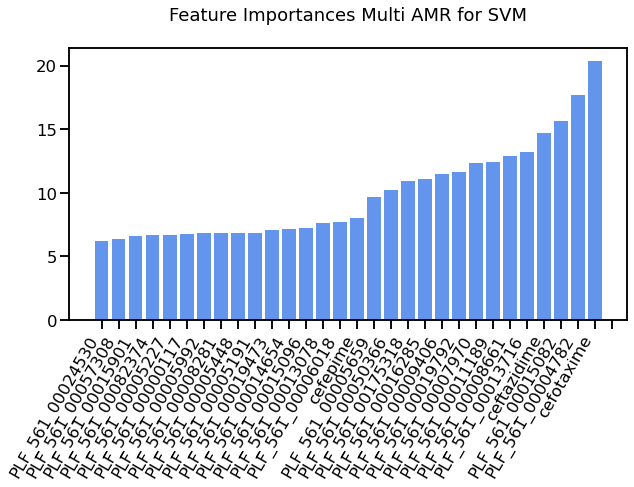

0.8493168647930552 0.5072077765243527
['cefotaxime', 'aztreonam', 'ceftazidime', 'cefepime', 'cefoxitin', 'piperacillin', 'gentamicin', 'cefuroxime', 'tobramycin', 'ampicillin', 'ciprofloxacin', 'trimethoprim', 'sulfamethoxazole', 'amoxicillin']
0.841505855989983 0.5368103310844584
['cefotaxime', 'cefepime', 'ceftazidime', 'aztreonam', 'cefoxitin', 'gentamicin', 'piperacillin', 'cefuroxime', 'tobramycin', 'ciprofloxacin', 'ampicillin', 'trimethoprim', 'sulfamethoxazole', 'amoxicillin']
0.8396627843056415 0.5113283699926274
['cefotaxime', 'ceftazidime', 'cefepime', 'aztreonam', 'cefoxitin', 'piperacillin', 'gentamicin', 'cefuroxime', 'tobramycin', 'ampicillin', 'ciprofloxacin', 'trimethoprim', 'sulfamethoxazole', 'amoxicillin']
0.8445685120288295 0.5892744810774384
['cefotaxime', 'cefepime', 'ceftazidime', 'aztreonam', 'cefoxitin', 'gentamicin', 'piperacillin', 'cefuroxime', 'tobramycin', 'ampicillin', 'ciprofloxacin', 'trimethoprim', 'sulfamethoxazole', 'amoxicillin']
0.849345195034850

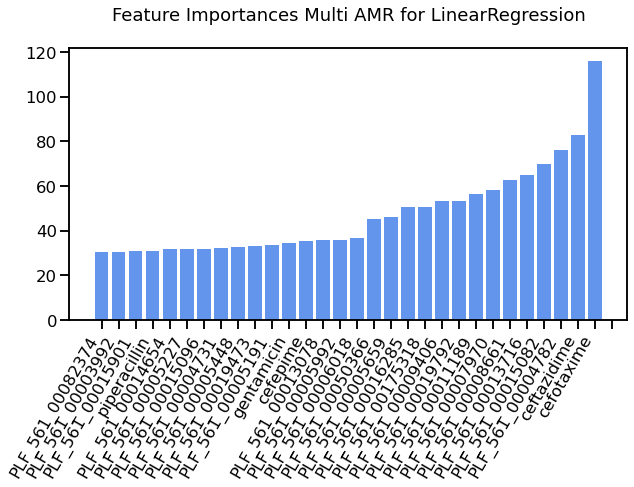

0.9025398543255686 0.6588497564505801
['cefotaxime', 'aztreonam', 'ceftazidime', 'cefepime', 'cefoxitin', 'piperacillin', 'gentamicin', 'cefuroxime', 'tobramycin', 'ampicillin', 'ciprofloxacin', 'trimethoprim', 'sulfamethoxazole', 'amoxicillin']
0.9213558487368012 0.6828163124935527
['cefotaxime', 'cefepime', 'ceftazidime', 'aztreonam', 'cefoxitin', 'gentamicin', 'piperacillin', 'cefuroxime', 'tobramycin', 'ciprofloxacin', 'ampicillin', 'trimethoprim', 'sulfamethoxazole', 'amoxicillin']
0.9121067057574995 0.6303420108752094
['cefotaxime', 'ceftazidime', 'cefepime', 'aztreonam', 'cefoxitin', 'piperacillin', 'gentamicin', 'cefuroxime', 'tobramycin', 'ampicillin', 'ciprofloxacin', 'trimethoprim', 'sulfamethoxazole', 'amoxicillin']
0.9116250372202753 0.6930493366863998
['cefotaxime', 'cefepime', 'ceftazidime', 'aztreonam', 'cefoxitin', 'gentamicin', 'piperacillin', 'cefuroxime', 'tobramycin', 'ampicillin', 'ciprofloxacin', 'trimethoprim', 'sulfamethoxazole', 'amoxicillin']
0.91598813064330

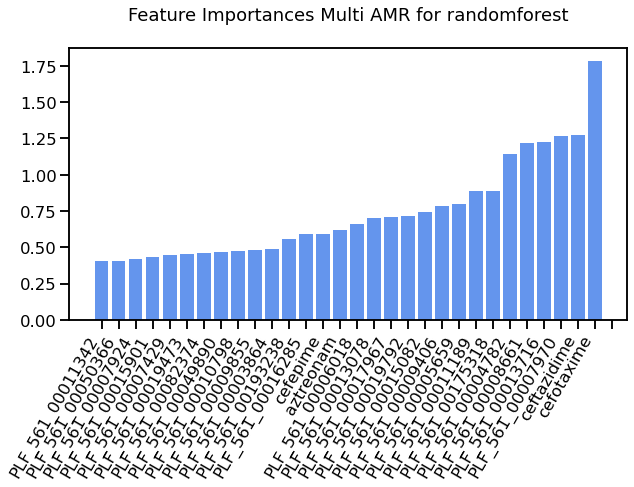

0.9337425654885972 0.7267870706749193
['cefotaxime', 'aztreonam', 'ceftazidime', 'cefepime', 'cefoxitin', 'piperacillin', 'gentamicin', 'cefuroxime', 'tobramycin', 'ampicillin', 'ciprofloxacin', 'trimethoprim', 'sulfamethoxazole', 'amoxicillin']
0.9343999328126312 0.7212381545015379
['cefotaxime', 'cefepime', 'ceftazidime', 'aztreonam', 'cefoxitin', 'gentamicin', 'piperacillin', 'cefuroxime', 'tobramycin', 'ciprofloxacin', 'ampicillin', 'trimethoprim', 'sulfamethoxazole', 'amoxicillin']
0.942547164769387 0.716368391645349
['cefotaxime', 'ceftazidime', 'cefepime', 'aztreonam', 'cefoxitin', 'piperacillin', 'gentamicin', 'cefuroxime', 'tobramycin', 'ampicillin', 'ciprofloxacin', 'trimethoprim', 'sulfamethoxazole', 'amoxicillin']
0.9391309161150431 0.7523463930330944
['cefotaxime', 'cefepime', 'ceftazidime', 'aztreonam', 'cefoxitin', 'gentamicin', 'piperacillin', 'cefuroxime', 'tobramycin', 'ampicillin', 'ciprofloxacin', 'trimethoprim', 'sulfamethoxazole', 'amoxicillin']
0.9386941602458844

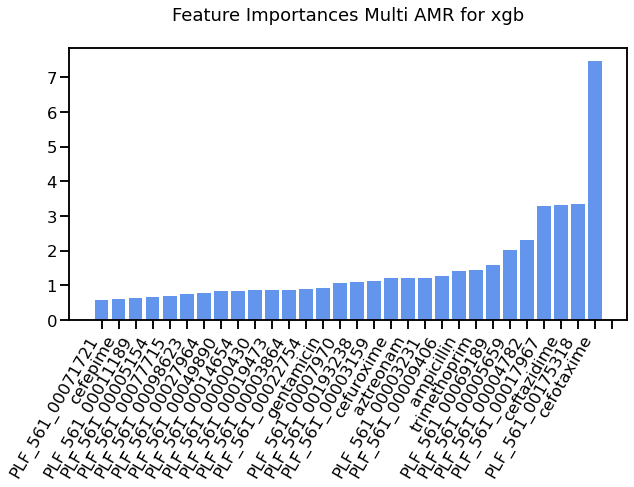

0.8835237293570628 0.6247965960995308
['cefotaxime', 'aztreonam', 'ceftazidime', 'cefepime', 'cefoxitin', 'piperacillin', 'gentamicin', 'cefuroxime', 'tobramycin', 'ampicillin', 'ciprofloxacin', 'trimethoprim', 'sulfamethoxazole', 'amoxicillin']
0.9001278850485198 0.6369229135466539
['cefotaxime', 'cefepime', 'ceftazidime', 'aztreonam', 'cefoxitin', 'gentamicin', 'piperacillin', 'cefuroxime', 'tobramycin', 'ciprofloxacin', 'ampicillin', 'trimethoprim', 'sulfamethoxazole', 'amoxicillin']
0.9129792826221397 0.6425164791639559
['cefotaxime', 'ceftazidime', 'cefepime', 'aztreonam', 'cefoxitin', 'piperacillin', 'gentamicin', 'cefuroxime', 'tobramycin', 'ampicillin', 'ciprofloxacin', 'trimethoprim', 'sulfamethoxazole', 'amoxicillin']
0.8949482542736511 0.6625283748512366
['cefotaxime', 'cefepime', 'ceftazidime', 'aztreonam', 'cefoxitin', 'gentamicin', 'piperacillin', 'cefuroxime', 'tobramycin', 'ampicillin', 'ciprofloxacin', 'trimethoprim', 'sulfamethoxazole', 'amoxicillin']
0.90939749905267

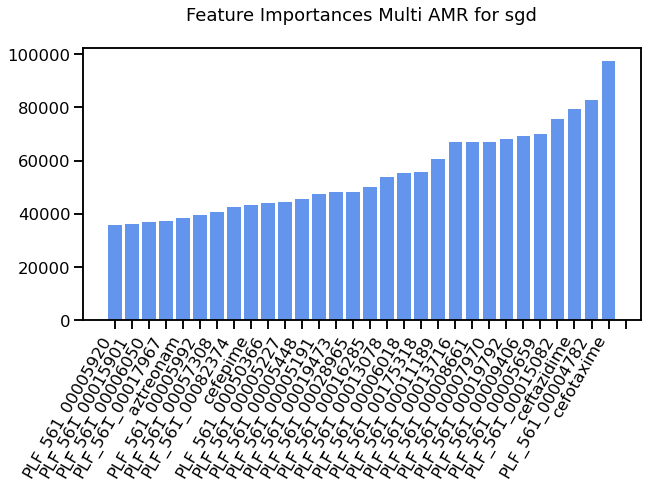

In [50]:
i=0
for basemodel in modellist:
    if(namelist[i] =='randomforest' or namelist[i] =='xgb'):
        type=1
    elif(namelist[i] =='Gaussian'):
        type=2
    else:
        type=0
    hamming, fscore, featuredf=RCCModelwithCE(X,Y,kfold,basemodel,namelist[i],type)
    if(type!=2):
        featuredf.to_csv('sim_all_df_T_RCC_14'+str(namelist[i])+'.csv')
        #print(featuredf)
        plot_coefficients(list(featuredf.index),featuredf["feature_weight_sum"],namelist[i],30)
    i=i+1

In [22]:
Y.columns.values

array(['amoxicillin', 'ampicillin', 'aztreonam', 'cefepime', 'cefotaxime',
       'cefoxitin', 'ceftazidime', 'cefuroxime', 'ciprofloxacin',
       'gentamicin', 'piperacillin', 'tobramycin', 'trimethoprim',
       'sulfamethoxazole'], dtype=object)

In [20]:
def RCCModelwithCE(X,Y,kfold, basemodel, name, type=0):
    sim_all_df = pd.DataFrame()
    hammingscorelist=[]
    fscorelist=[]
    for train_index, test_index in kfold.split(X, Y):
        # split data into train/test sets
        x_train_tfidf = X.iloc[train_index]
        y_train_tfidf = Y.iloc[train_index]
        x_test_tfidf = X.iloc[test_index]
        y_test_tfidf = Y.iloc[test_index]
        x_train_tfidf=x_train_tfidf.reset_index(drop=True)
        y_train_tfidf=y_train_tfidf.reset_index(drop=True)
        classifier=RectifiedClassiferChain(basemodel,optimized=True,optimizedmethod='ConditionalProb')
        classifier.trainRCC(x_train_tfidf, y_train_tfidf)
        # calculating test accuracy
        x_test_tfidf=x_test_tfidf.reset_index(drop=True)
        y_test_tfidf=y_test_tfidf.reset_index(drop=True)
        prediction = classifier.predictRCC(x_test_tfidf)
        hammingscore, fscore=classifier.Evaluate(y_test_tfidf,prediction)
        
        #hammingscore1=hamming_score(np.array(prediction),y_test_tfidf.values)
        #fscore1=Modified_F1_Score(np.array(prediction),y_test_tfidf.values)
        
        print(hammingscore,fscore)
        #print(hammingscore1,fscore1)
        hammingscorelist.append(hammingscore)
        fscorelist.append(fscore)
        label_order=classifier.getOptimizedLabelOrder()
        print (label_order)
        if(type !=2):
            featuredf=classifier.getFeature(NoOfFeature=100,type=type,full=True)
            #featuredf.to_csv('Test.csv')
            sim_all_df = pd.concat([sim_all_df, featuredf], ignore_index=True)
    print ('Base model for RCC is {}'.format(name))
    print('Test Hamming accuracy for RCC is {}'.format(np.mean(hammingscorelist)))
    print('Test F-score accuracy for RCC is {}'.format(np.mean(fscorelist)))
    print('Hamming std'+str(np.std(hammingscorelist)))
    print('F-Score std'+str(np.std(fscorelist)))
    if(type !=2):
        sim_all_df_T = sim_all_df.transpose().copy()
        sim_all_df_T["feature_weight_sum"] = sim_all_df_T.apply(lambda x: abs(x).sum(), axis=1)
        sim_all_df_T_top = sim_all_df_T.sort_values("feature_weight_sum", ascending=False)[:30]
        sim_all_df_T_top.to_csv('Test.csv')
    else:
        sim_all_df_T_top=sim_all_df.copy()
    return np.mean(hammingscorelist),np.mean(fscorelist),sim_all_df_T_top

0.9026706024721899 0.6520225132259428
['aztreonam', 'cefotaxime', 'cefuroxime', 'ceftazidime', 'cefepime', 'tobramycin', 'cefoxitin', 'ciprofloxacin', 'gentamicin', 'piperacillin', 'trimethoprim', 'sulfamethoxazole', 'ampicillin', 'amoxicillin']
0.9132984226238196 0.6647944787253517
['aztreonam', 'cefotaxime', 'cefuroxime', 'ceftazidime', 'cefepime', 'tobramycin', 'cefoxitin', 'ciprofloxacin', 'gentamicin', 'piperacillin', 'trimethoprim', 'sulfamethoxazole', 'ampicillin', 'amoxicillin']
0.9117749681241746 0.6538449823291268
['aztreonam', 'cefotaxime', 'cefuroxime', 'ceftazidime', 'cefepime', 'cefoxitin', 'tobramycin', 'ciprofloxacin', 'gentamicin', 'piperacillin', 'trimethoprim', 'sulfamethoxazole', 'ampicillin', 'amoxicillin']
0.9127889820350139 0.6877078429586457
['aztreonam', 'cefotaxime', 'cefuroxime', 'ceftazidime', 'cefepime', 'tobramycin', 'cefoxitin', 'ciprofloxacin', 'gentamicin', 'piperacillin', 'trimethoprim', 'sulfamethoxazole', 'ampicillin', 'amoxicillin']
0.91285639647708

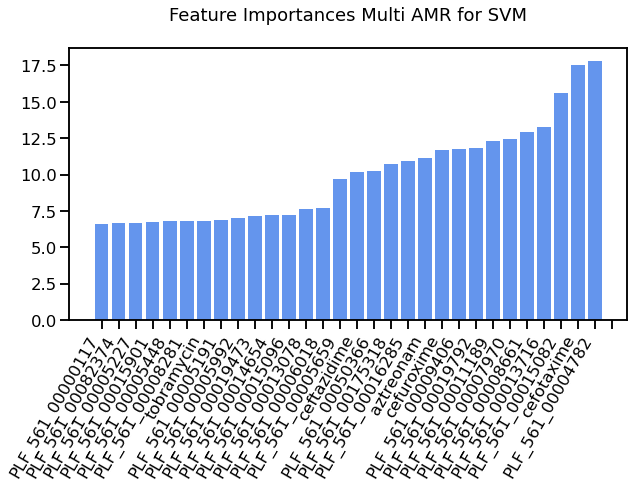

0.8493168647930552 0.5072077765243527
['aztreonam', 'cefotaxime', 'cefuroxime', 'ceftazidime', 'cefepime', 'tobramycin', 'cefoxitin', 'ciprofloxacin', 'gentamicin', 'piperacillin', 'trimethoprim', 'sulfamethoxazole', 'ampicillin', 'amoxicillin']
0.841505855989983 0.5368103310844584
['aztreonam', 'cefotaxime', 'cefuroxime', 'ceftazidime', 'cefepime', 'tobramycin', 'cefoxitin', 'ciprofloxacin', 'gentamicin', 'piperacillin', 'trimethoprim', 'sulfamethoxazole', 'ampicillin', 'amoxicillin']
0.8396627843056415 0.5113283699926274
['aztreonam', 'cefotaxime', 'cefuroxime', 'ceftazidime', 'cefepime', 'cefoxitin', 'tobramycin', 'ciprofloxacin', 'gentamicin', 'piperacillin', 'trimethoprim', 'sulfamethoxazole', 'ampicillin', 'amoxicillin']
0.8445685120288295 0.5892744810774384
['aztreonam', 'cefotaxime', 'cefuroxime', 'ceftazidime', 'cefepime', 'tobramycin', 'cefoxitin', 'ciprofloxacin', 'gentamicin', 'piperacillin', 'trimethoprim', 'sulfamethoxazole', 'ampicillin', 'amoxicillin']
0.849345195034850

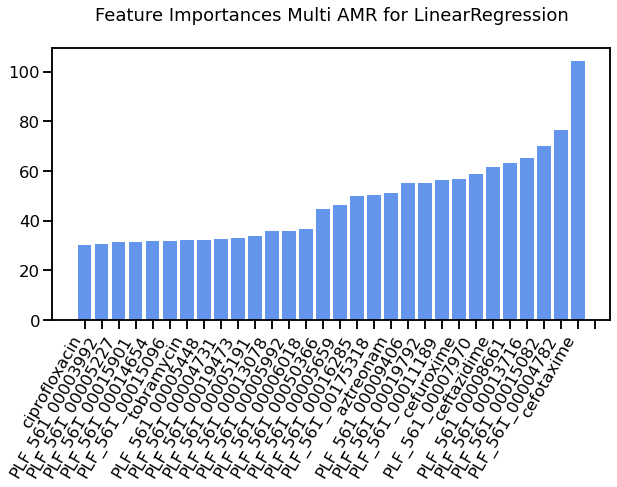

0.9050466875863701 0.6586676923456715
['aztreonam', 'cefotaxime', 'cefuroxime', 'ceftazidime', 'cefepime', 'tobramycin', 'cefoxitin', 'ciprofloxacin', 'gentamicin', 'piperacillin', 'trimethoprim', 'sulfamethoxazole', 'ampicillin', 'amoxicillin']
0.9182031005443704 0.6776861645188391
['aztreonam', 'cefotaxime', 'cefuroxime', 'ceftazidime', 'cefepime', 'tobramycin', 'cefoxitin', 'ciprofloxacin', 'gentamicin', 'piperacillin', 'trimethoprim', 'sulfamethoxazole', 'ampicillin', 'amoxicillin']
0.9134481626545117 0.6325027667833106
['aztreonam', 'cefotaxime', 'cefuroxime', 'ceftazidime', 'cefepime', 'cefoxitin', 'tobramycin', 'ciprofloxacin', 'gentamicin', 'piperacillin', 'trimethoprim', 'sulfamethoxazole', 'ampicillin', 'amoxicillin']
0.9061229261626086 0.6794878051691736
['aztreonam', 'cefotaxime', 'cefuroxime', 'ceftazidime', 'cefepime', 'tobramycin', 'cefoxitin', 'ciprofloxacin', 'gentamicin', 'piperacillin', 'trimethoprim', 'sulfamethoxazole', 'ampicillin', 'amoxicillin']
0.91587464259878

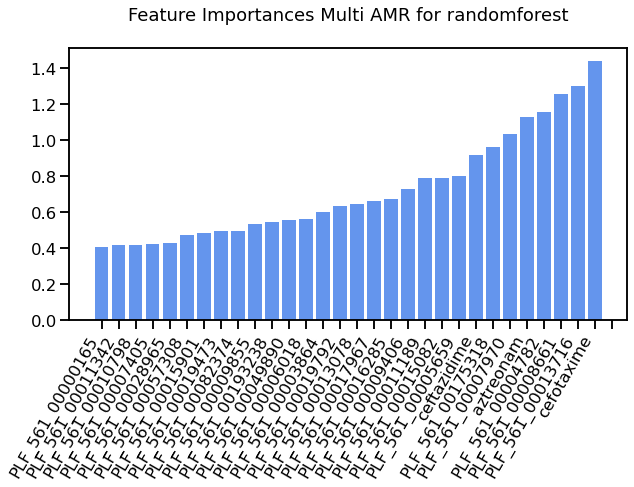

0.9308628614184171 0.7203190558018305
['aztreonam', 'cefotaxime', 'cefuroxime', 'ceftazidime', 'cefepime', 'tobramycin', 'cefoxitin', 'ciprofloxacin', 'gentamicin', 'piperacillin', 'trimethoprim', 'sulfamethoxazole', 'ampicillin', 'amoxicillin']
0.9310734900020613 0.7202585510397497
['aztreonam', 'cefotaxime', 'cefuroxime', 'ceftazidime', 'cefepime', 'tobramycin', 'cefoxitin', 'ciprofloxacin', 'gentamicin', 'piperacillin', 'trimethoprim', 'sulfamethoxazole', 'ampicillin', 'amoxicillin']
0.9397837979187186 0.7110986317391567
['aztreonam', 'cefotaxime', 'cefuroxime', 'ceftazidime', 'cefepime', 'cefoxitin', 'tobramycin', 'ciprofloxacin', 'gentamicin', 'piperacillin', 'trimethoprim', 'sulfamethoxazole', 'ampicillin', 'amoxicillin']
0.9360556624445513 0.7498979255175829
['aztreonam', 'cefotaxime', 'cefuroxime', 'ceftazidime', 'cefepime', 'tobramycin', 'cefoxitin', 'ciprofloxacin', 'gentamicin', 'piperacillin', 'trimethoprim', 'sulfamethoxazole', 'ampicillin', 'amoxicillin']
0.93923222371498

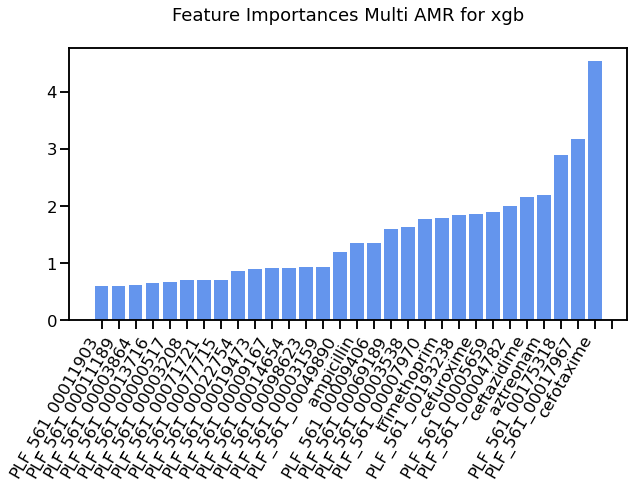

0.8832121288470495 0.6315990503105703
['aztreonam', 'cefotaxime', 'cefuroxime', 'ceftazidime', 'cefepime', 'tobramycin', 'cefoxitin', 'ciprofloxacin', 'gentamicin', 'piperacillin', 'trimethoprim', 'sulfamethoxazole', 'ampicillin', 'amoxicillin']
0.9002529069989388 0.6299910542133095
['aztreonam', 'cefotaxime', 'cefuroxime', 'ceftazidime', 'cefepime', 'tobramycin', 'cefoxitin', 'ciprofloxacin', 'gentamicin', 'piperacillin', 'trimethoprim', 'sulfamethoxazole', 'ampicillin', 'amoxicillin']
0.9092616451743436 0.6301397389382543
['aztreonam', 'cefotaxime', 'cefuroxime', 'ceftazidime', 'cefepime', 'cefoxitin', 'tobramycin', 'ciprofloxacin', 'gentamicin', 'piperacillin', 'trimethoprim', 'sulfamethoxazole', 'ampicillin', 'amoxicillin']
0.8984816990769372 0.6708792364464
['aztreonam', 'cefotaxime', 'cefuroxime', 'ceftazidime', 'cefepime', 'tobramycin', 'cefoxitin', 'ciprofloxacin', 'gentamicin', 'piperacillin', 'trimethoprim', 'sulfamethoxazole', 'ampicillin', 'amoxicillin']
0.9072480201790546 

C:\Users\cvssp_user\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


0.8827672988387275 0.6612549467066321
['aztreonam', 'cefotaxime', 'cefuroxime', 'ceftazidime', 'cefepime', 'tobramycin', 'cefoxitin', 'ciprofloxacin', 'gentamicin', 'piperacillin', 'trimethoprim', 'sulfamethoxazole', 'ampicillin', 'amoxicillin']
0.9126544164242577 0.658739688568367
['aztreonam', 'cefotaxime', 'cefuroxime', 'ceftazidime', 'cefepime', 'cefoxitin', 'tobramycin', 'ciprofloxacin', 'gentamicin', 'piperacillin', 'trimethoprim', 'sulfamethoxazole', 'ampicillin', 'amoxicillin']


C:\Users\cvssp_user\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


0.896356039610008 0.650854363859291
['aztreonam', 'cefotaxime', 'cefuroxime', 'ceftazidime', 'cefepime', 'cefoxitin', 'tobramycin', 'ciprofloxacin', 'piperacillin', 'gentamicin', 'trimethoprim', 'sulfamethoxazole', 'ampicillin', 'amoxicillin']
0.8887105231932818 0.6098553453467073
['aztreonam', 'cefotaxime', 'cefuroxime', 'ceftazidime', 'cefepime', 'tobramycin', 'cefoxitin', 'ciprofloxacin', 'gentamicin', 'piperacillin', 'trimethoprim', 'sulfamethoxazole', 'ampicillin', 'amoxicillin']
Base model for RCC is sgd
Test Hamming accuracy for RCC is 0.8977529740323941
Test F-score accuracy for RCC is 0.6389503023438705
Hamming std0.010448101684270962
F-Score std0.021849831567092328


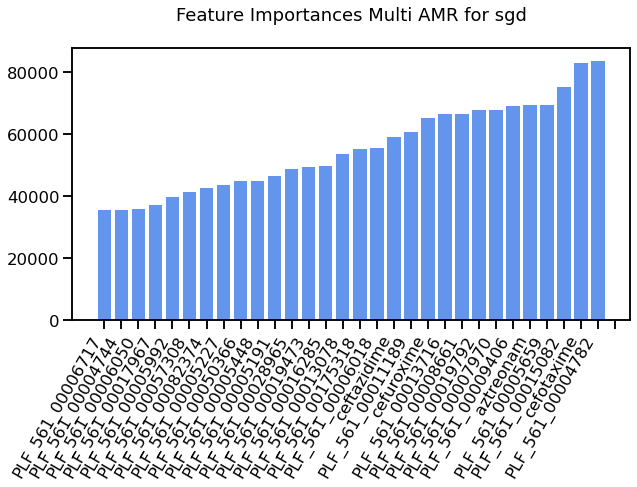

In [21]:
i=0
for basemodel in modellist:
    if(namelist[i] =='randomforest' or namelist[i] =='xgb'):
        type=1
    elif(namelist[i] =='Gaussian'):
        type=2
    else:
        type=0
    hamming, fscore, featuredf=RCCModelwithCE(X,Y,kfold,basemodel,namelist[i],type)
    if(type!=2):
        featuredf.to_csv('sim_all_df_T_RCC_PC'+str(namelist[i])+'.csv')
        #print(featuredf)
        plot_coefficients(list(featuredf.index),featuredf["feature_weight_sum"],namelist[i],30)
    i=i+1

In [22]:
def RCCModelwithMR(X,Y,kfold, basemodel, name, type=0):
    sim_all_df = pd.DataFrame()
    hammingscorelist=[]
    fscorelist=[]
    for train_index, test_index in kfold.split(X, Y):
        # split data into train/test sets
        x_train_tfidf = X.iloc[train_index]
        y_train_tfidf = Y.iloc[train_index]
        x_test_tfidf = X.iloc[test_index]
        y_test_tfidf = Y.iloc[test_index]
        x_train_tfidf=x_train_tfidf.reset_index(drop=True)
        y_train_tfidf=y_train_tfidf.reset_index(drop=True)
        classifier=RectifiedClassiferChain(basemodel,optimized=True,optimizedmethod='MissingRatio')
        classifier.trainRCC(x_train_tfidf, y_train_tfidf)
        # calculating test accuracy
        x_test_tfidf=x_test_tfidf.reset_index(drop=True)
        y_test_tfidf=y_test_tfidf.reset_index(drop=True)
        prediction = classifier.predictRCC(x_test_tfidf)
        hammingscore, fscore=classifier.Evaluate(y_test_tfidf,prediction)
        
        #hammingscore1=hamming_score(np.array(prediction),y_test_tfidf.values)
        #fscore1=Modified_F1_Score(np.array(prediction),y_test_tfidf.values)
        
        print(hammingscore,fscore)
        #print(hammingscore1,fscore1)
        hammingscorelist.append(hammingscore)
        fscorelist.append(fscore)
        label_order=classifier.getOptimizedLabelOrder()
        print (label_order)
        if(type !=2):
            featuredf=classifier.getFeature(NoOfFeature=100,type=type,full=True)
            #featuredf.to_csv('Test.csv')
            sim_all_df = pd.concat([sim_all_df, featuredf], ignore_index=True)
    print ('Base model for RCC is {}'.format(name))
    print('Test Hamming accuracy for RCC is {}'.format(np.mean(hammingscorelist)))
    print('Test F-score accuracy for RCC is {}'.format(np.mean(fscorelist)))
    print('Hamming std'+str(np.std(hammingscorelist)))
    print('F-Score std'+str(np.std(fscorelist)))
    if(type !=2):
        sim_all_df_T = sim_all_df.transpose().copy()
        sim_all_df_T["feature_weight_sum"] = sim_all_df_T.apply(lambda x: abs(x).sum(), axis=1)
        sim_all_df_T_top = sim_all_df_T.sort_values("feature_weight_sum", ascending=False)[:30]
        sim_all_df_T_top.to_csv('Test.csv')
    else:
        sim_all_df_T_top=sim_all_df.copy()
    return np.mean(hammingscorelist),np.mean(fscorelist),sim_all_df_T_top

0.9019582636646128 0.646301105697012
['ciprofloxacin', 'gentamicin', 'ceftazidime', 'piperacillin', 'cefotaxime', 'cefuroxime', 'amoxicillin', 'ampicillin', 'cefepime', 'tobramycin', 'cefoxitin', 'aztreonam', 'trimethoprim', 'sulfamethoxazole']
0.9122514830848165 0.6678878359840644
['ciprofloxacin', 'gentamicin', 'ceftazidime', 'piperacillin', 'cefotaxime', 'cefuroxime', 'amoxicillin', 'ampicillin', 'cefepime', 'tobramycin', 'cefoxitin', 'aztreonam', 'trimethoprim', 'sulfamethoxazole']
0.9128910992006231 0.6544402204244583
['ciprofloxacin', 'gentamicin', 'ceftazidime', 'piperacillin', 'cefotaxime', 'cefuroxime', 'amoxicillin', 'ampicillin', 'cefepime', 'tobramycin', 'cefoxitin', 'aztreonam', 'trimethoprim', 'sulfamethoxazole']
0.9137967925666338 0.6950963432796664
['ciprofloxacin', 'gentamicin', 'ceftazidime', 'piperacillin', 'cefotaxime', 'cefuroxime', 'amoxicillin', 'ampicillin', 'cefepime', 'tobramycin', 'cefoxitin', 'aztreonam', 'trimethoprim', 'sulfamethoxazole']
0.915496476703373

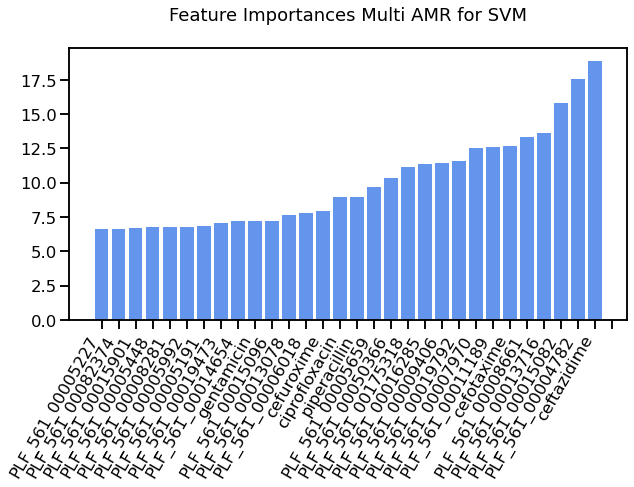

0.8488759476854714 0.5063259423093909
['ciprofloxacin', 'gentamicin', 'ceftazidime', 'piperacillin', 'cefotaxime', 'cefuroxime', 'amoxicillin', 'ampicillin', 'cefepime', 'tobramycin', 'cefoxitin', 'aztreonam', 'trimethoprim', 'sulfamethoxazole']
0.8412853974361912 0.5364667593123205
['ciprofloxacin', 'gentamicin', 'ceftazidime', 'piperacillin', 'cefotaxime', 'cefuroxime', 'amoxicillin', 'ampicillin', 'cefepime', 'tobramycin', 'cefoxitin', 'aztreonam', 'trimethoprim', 'sulfamethoxazole']
0.8396627843056415 0.5113283699926274
['ciprofloxacin', 'gentamicin', 'ceftazidime', 'piperacillin', 'cefotaxime', 'cefuroxime', 'amoxicillin', 'ampicillin', 'cefepime', 'tobramycin', 'cefoxitin', 'aztreonam', 'trimethoprim', 'sulfamethoxazole']
0.8441905830794719 0.5888965521280931
['ciprofloxacin', 'gentamicin', 'ceftazidime', 'piperacillin', 'cefotaxime', 'cefuroxime', 'amoxicillin', 'ampicillin', 'cefepime', 'tobramycin', 'cefoxitin', 'aztreonam', 'trimethoprim', 'sulfamethoxazole']
0.84868206506137

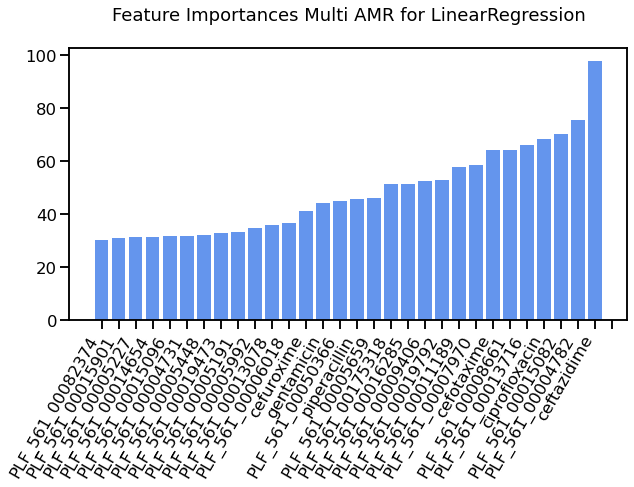

0.9015297533154677 0.6596701489259597
['ciprofloxacin', 'gentamicin', 'ceftazidime', 'piperacillin', 'cefotaxime', 'cefuroxime', 'amoxicillin', 'ampicillin', 'cefepime', 'tobramycin', 'cefoxitin', 'aztreonam', 'trimethoprim', 'sulfamethoxazole']
0.9159198752452722 0.6677886939218994
['ciprofloxacin', 'gentamicin', 'ceftazidime', 'piperacillin', 'cefotaxime', 'cefuroxime', 'amoxicillin', 'ampicillin', 'cefepime', 'tobramycin', 'cefoxitin', 'aztreonam', 'trimethoprim', 'sulfamethoxazole']
0.9107869129694527 0.6159790687905294
['ciprofloxacin', 'gentamicin', 'ceftazidime', 'piperacillin', 'cefotaxime', 'cefuroxime', 'amoxicillin', 'ampicillin', 'cefepime', 'tobramycin', 'cefoxitin', 'aztreonam', 'trimethoprim', 'sulfamethoxazole']
0.9031404368705956 0.6701494066265028
['ciprofloxacin', 'gentamicin', 'ceftazidime', 'piperacillin', 'cefotaxime', 'cefuroxime', 'amoxicillin', 'ampicillin', 'cefepime', 'tobramycin', 'cefoxitin', 'aztreonam', 'trimethoprim', 'sulfamethoxazole']
0.91338316855558

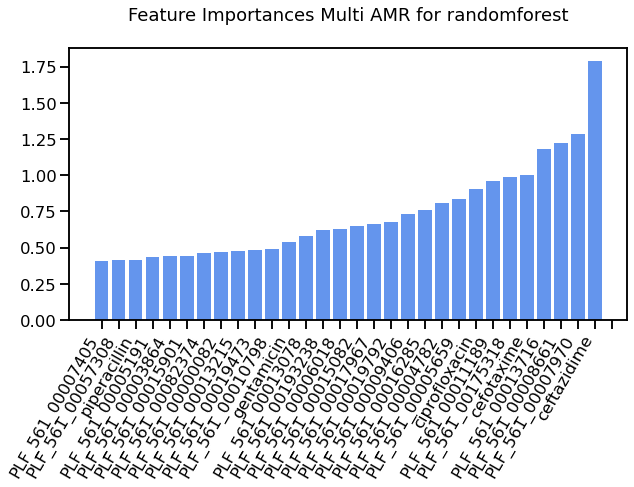

0.9328918436061292 0.7221720723258086
['ciprofloxacin', 'gentamicin', 'ceftazidime', 'piperacillin', 'cefotaxime', 'cefuroxime', 'amoxicillin', 'ampicillin', 'cefepime', 'tobramycin', 'cefoxitin', 'aztreonam', 'trimethoprim', 'sulfamethoxazole']
0.9376730265619155 0.7301975915199775
['ciprofloxacin', 'gentamicin', 'ceftazidime', 'piperacillin', 'cefotaxime', 'cefuroxime', 'amoxicillin', 'ampicillin', 'cefepime', 'tobramycin', 'cefoxitin', 'aztreonam', 'trimethoprim', 'sulfamethoxazole']
0.9426695144949112 0.7154639288633315
['ciprofloxacin', 'gentamicin', 'ceftazidime', 'piperacillin', 'cefotaxime', 'cefuroxime', 'amoxicillin', 'ampicillin', 'cefepime', 'tobramycin', 'cefoxitin', 'aztreonam', 'trimethoprim', 'sulfamethoxazole']
0.9361882238866366 0.753949116052181
['ciprofloxacin', 'gentamicin', 'ceftazidime', 'piperacillin', 'cefotaxime', 'cefuroxime', 'amoxicillin', 'ampicillin', 'cefepime', 'tobramycin', 'cefoxitin', 'aztreonam', 'trimethoprim', 'sulfamethoxazole']
0.938273029652339

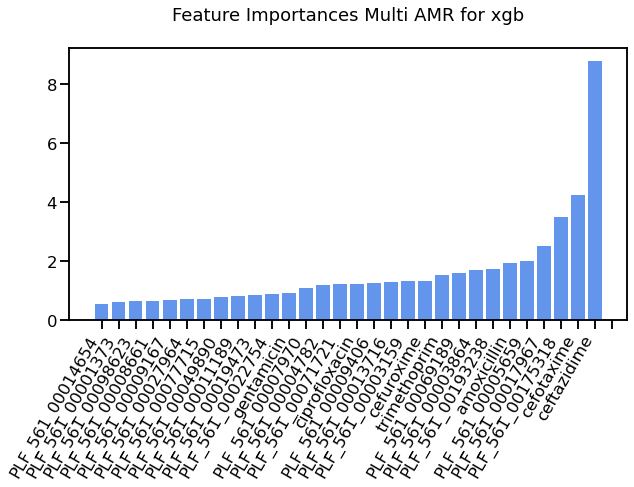

0.8852612481580736 0.6135098764621518
['ciprofloxacin', 'gentamicin', 'ceftazidime', 'piperacillin', 'cefotaxime', 'cefuroxime', 'amoxicillin', 'ampicillin', 'cefepime', 'tobramycin', 'cefoxitin', 'aztreonam', 'trimethoprim', 'sulfamethoxazole']


C:\Users\cvssp_user\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


0.8980503256296907 0.6301818177317632
['ciprofloxacin', 'gentamicin', 'ceftazidime', 'piperacillin', 'cefotaxime', 'cefuroxime', 'amoxicillin', 'ampicillin', 'cefepime', 'tobramycin', 'cefoxitin', 'aztreonam', 'trimethoprim', 'sulfamethoxazole']
0.9048675530818389 0.6325855588423432
['ciprofloxacin', 'gentamicin', 'ceftazidime', 'piperacillin', 'cefotaxime', 'cefuroxime', 'amoxicillin', 'ampicillin', 'cefepime', 'tobramycin', 'cefoxitin', 'aztreonam', 'trimethoprim', 'sulfamethoxazole']
0.8983087679516252 0.6653478044896698
['ciprofloxacin', 'gentamicin', 'ceftazidime', 'piperacillin', 'cefotaxime', 'cefuroxime', 'amoxicillin', 'ampicillin', 'cefepime', 'tobramycin', 'cefoxitin', 'aztreonam', 'trimethoprim', 'sulfamethoxazole']
0.9011951649882682 0.627481224374219
['ciprofloxacin', 'gentamicin', 'ceftazidime', 'piperacillin', 'cefotaxime', 'cefuroxime', 'amoxicillin', 'ampicillin', 'cefepime', 'tobramycin', 'cefoxitin', 'aztreonam', 'trimethoprim', 'sulfamethoxazole']
0.904224978431327

C:\Users\cvssp_user\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


0.8930670079479603 0.5947851142644118
['ciprofloxacin', 'gentamicin', 'ceftazidime', 'piperacillin', 'cefotaxime', 'cefuroxime', 'amoxicillin', 'ampicillin', 'cefepime', 'tobramycin', 'cefoxitin', 'aztreonam', 'trimethoprim', 'sulfamethoxazole']
0.9058744092474251 0.6455152487046147
['ciprofloxacin', 'gentamicin', 'ceftazidime', 'piperacillin', 'cefotaxime', 'cefuroxime', 'amoxicillin', 'ampicillin', 'cefepime', 'tobramycin', 'cefoxitin', 'aztreonam', 'trimethoprim', 'sulfamethoxazole']
0.8948296265756582 0.6431194011929887
['ciprofloxacin', 'gentamicin', 'ceftazidime', 'piperacillin', 'cefotaxime', 'cefuroxime', 'amoxicillin', 'ampicillin', 'cefepime', 'tobramycin', 'cefoxitin', 'aztreonam', 'trimethoprim', 'sulfamethoxazole']
0.8899685563478666 0.6311836392228984
['ciprofloxacin', 'gentamicin', 'ceftazidime', 'piperacillin', 'cefotaxime', 'cefuroxime', 'amoxicillin', 'ampicillin', 'cefepime', 'tobramycin', 'cefoxitin', 'aztreonam', 'trimethoprim', 'sulfamethoxazole']
0.91251841926445

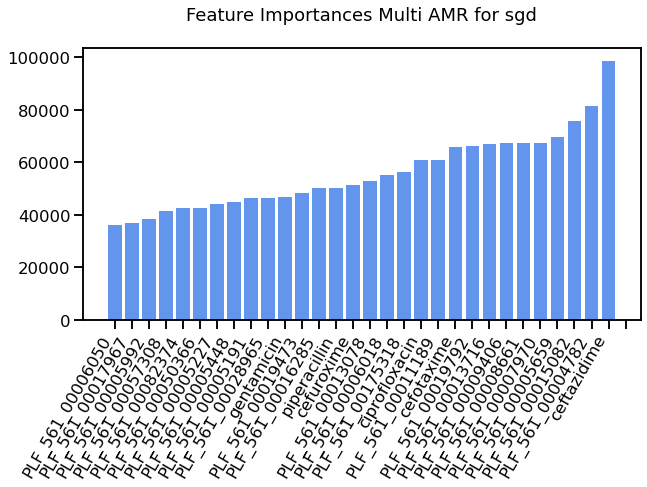

In [23]:
i=0
for basemodel in modellist:
    if(namelist[i] =='randomforest' or namelist[i] =='xgb'):
        type=1
    elif(namelist[i] =='Gaussian'):
        type=2
    else:
        type=0
    hamming, fscore, featuredf=RCCModelwithMR(X,Y,kfold,basemodel,namelist[i],type)
    if(type!=2):
        featuredf.to_csv('sim_all_df_T_RCC_MR'+str(namelist[i])+'.csv')
        #print(featuredf)
        plot_coefficients(list(featuredf.index),featuredf["feature_weight_sum"],namelist[i],30)
    i=i+1